# READ THE DATA 
1. Directly from CSV file KAGGLE
or
2. Download the orignal text files url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz" 

In [15]:
# READ ALL Text files and made CSV
import pyprind # to show progress
import pandas as pd
import os
pbar=pyprind.ProgBar(50000) # 50000 file

df=pd.DataFrame()
for s in ('test','train'):
    for l in ('pos','neg'):
        path='./aclImdb/%s/%s'%(s,l)
        for file in os.listdir(path):
            
            with open(os.path.join(path,file),'r',encoding='utf8') as infile:
                txt=infile.read()
            df=df.append([[txt,l]],ignore_index=True)
            pbar.update()
            

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:02:38


In [16]:
df.columns=['review','sentiment']
df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,pos
1,Actor turned director Bill Paxton follows up h...,pos
2,As a recreational golfer with some knowledge o...,pos
3,"I saw this film in a sneak preview, and it is ...",pos
4,Bill Paxton has taken the true story of the 19...,pos


In [17]:
df.to_csv('sentiment_data.csv',index=False)

In [44]:
###### REad CSV file
df=pd.read_csv('sentiment_data.csv')
print(df.head())
print(df.shape)
### contribution of each samples
print(df['sentiment'].value_counts())

                                              review sentiment
0  I went and saw this movie last night after bei...       pos
1  Actor turned director Bill Paxton follows up h...       pos
2  As a recreational golfer with some knowledge o...       pos
3  I saw this film in a sneak preview, and it is ...       pos
4  Bill Paxton has taken the true story of the 19...       pos
(50000, 2)
pos    25000
neg    25000
Name: sentiment, dtype: int64


In [45]:
###### MISSING values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

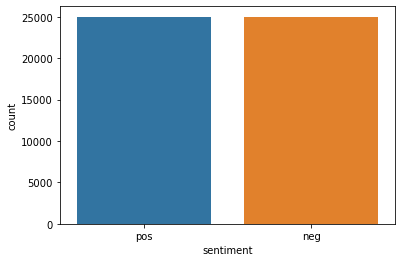

In [46]:
import seaborn as sns
sns.countplot(x='sentiment',data=df)

In [47]:
#################
#map positive to 1 and negative to 0
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'pos' else 0)
print(df.head())
df['sentiment'].value_counts()

                                              review  sentiment
0  I went and saw this movie last night after bei...          1
1  Actor turned director Bill Paxton follows up h...          1
2  As a recreational golfer with some knowledge o...          1
3  I saw this film in a sneak preview, and it is ...          1
4  Bill Paxton has taken the true story of the 19...          1


1    25000
0    25000
Name: sentiment, dtype: int64

In [48]:
import re
import string
def clean_text(text):
    
    text=text.lower() #lowercase every letter
    text=re.sub('<br />','',text)
    text = text.split() #split by all white spaces
    text = " ".join(text)#join tokens by single space, this will remove all kinds of weird spaces
    text = re.sub(re.escape(string.punctuation), '', text)#removes all punctuation using regex and string module
    return text
df.loc[:,'review'] = df.review.apply(clean_text)
print(df.head())

                                              review  sentiment
0  i went and saw this movie last night after bei...          1
1  actor turned director bill paxton follows up h...          1
2  as a recreational golfer with some knowledge o...          1
3  i saw this film in a sneak preview, and it is ...          1
4  bill paxton has taken the true story of the 19...          1


In [49]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=0)
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(35000,) (35000,)
(15000,) (15000,)


In [50]:
######### Feature extraction
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = word_tokenize, token_pattern = None, stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
test_x_vector = tfidf.transform(test_x)

In [51]:
df1=pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names())
print(df1.shape)

(35000, 161703)


In [52]:
print(train_x_vector)

  (0, 24402)	0.04592599622886422
  (0, 22524)	0.021496474594050727
  (0, 106347)	0.05082368093141137
  (0, 80293)	0.012447771388874528
  (0, 86220)	0.03291267394247257
  (0, 18647)	0.0395810686497683
  (0, 86339)	0.01778343000958246
  (0, 141420)	0.04905486441495321
  (0, 67602)	0.03179453612882691
  (0, 84989)	0.04185316304406786
  (0, 142206)	0.033142424641775664
  (0, 26094)	0.029721503647858232
  (0, 149526)	0.03764591461140876
  (0, 94618)	0.04873006268372236
  (0, 119504)	0.038079554433624256
  (0, 92056)	0.03159824333467539
  (0, 115746)	0.060348322338904636
  (0, 25089)	0.06168421022538647
  (0, 41121)	0.05093246113645112
  (0, 66559)	0.0226893895608625
  (0, 19080)	0.016459325282233764
  (0, 146833)	0.04433046649464749
  (0, 96278)	0.04087549750132617
  (0, 156163)	0.059236224094689774
  (0, 54182)	0.028313057931940444
  :	:
  (34998, 64377)	0.050411891618218685
  (34998, 85747)	0.09066960674495093
  (34998, 4725)	0.15426984100083266
  (34998, 4213)	0.02636879168098725
  (3499

In [ ]:
########### SVM MODEL
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)
svc.score(test_x_vector, test_y)

In [ ]:
print(svc.predict(tfidf.transform(['A good movie'])))
#print(svc.predict(tfidf.transform(['An excellent movie'])))
#print(svc.predict(tfidf.transform(['I did not like this movie at all'])))